In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('heart_failure_clinical_records.csv')

In [3]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
dataset.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
dataset.shape

(299, 13)

In [8]:
dataset['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

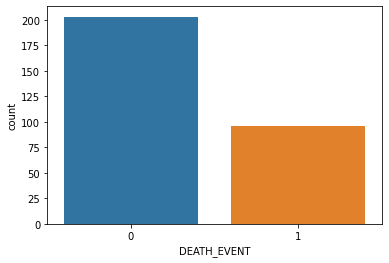

In [9]:
sns.countplot(dataset['DEATH_EVENT'])

In [10]:
X = dataset.drop('DEATH_EVENT', axis=1)
y= dataset['DEATH_EVENT']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =
                                                    0.2, stratify=y, random_state=99)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
import imblearn

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

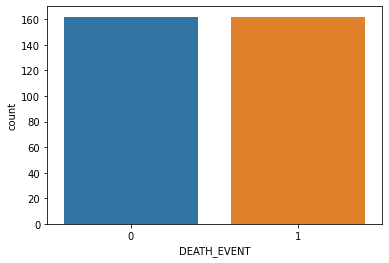

In [13]:
from imblearn.over_sampling import RandomOverSampler

resampler = RandomOverSampler(random_state=0)

X_train_oversampled, y_train_oversampled = resampler.fit_resample(X_train, y_train)

sns.countplot(x=y_train_oversampled)

In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8,activation='relu',input_shape=(12,)))
model.add(tf.keras.layers.Dense(8,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [15]:
model.compile(optimizer='adam',

 loss='binary_crossentropy',

 metrics='accuracy')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 104       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train_oversampled, y_train_oversampled,
                    batch_size = 12, epochs=50, \
                    verbose=2, \
                    validation_split=0.2)

Epoch 1/50
22/22 - 1s - loss: 0.6640 - accuracy: 0.6293 - val_loss: 0.6482 - val_accuracy: 0.6462 - 821ms/epoch - 37ms/step
Epoch 2/50
22/22 - 0s - loss: 0.6403 - accuracy: 0.6834 - val_loss: 0.6539 - val_accuracy: 0.6615 - 58ms/epoch - 3ms/step
Epoch 3/50
22/22 - 0s - loss: 0.6193 - accuracy: 0.6873 - val_loss: 0.6412 - val_accuracy: 0.6923 - 63ms/epoch - 3ms/step
Epoch 4/50
22/22 - 0s - loss: 0.6011 - accuracy: 0.7066 - val_loss: 0.6297 - val_accuracy: 0.7077 - 55ms/epoch - 2ms/step
Epoch 5/50
22/22 - 0s - loss: 0.5811 - accuracy: 0.7297 - val_loss: 0.6182 - val_accuracy: 0.7231 - 59ms/epoch - 3ms/step
Epoch 6/50
22/22 - 0s - loss: 0.5624 - accuracy: 0.7490 - val_loss: 0.6171 - val_accuracy: 0.6769 - 59ms/epoch - 3ms/step
Epoch 7/50
22/22 - 0s - loss: 0.5449 - accuracy: 0.7645 - val_loss: 0.6035 - val_accuracy: 0.7077 - 59ms/epoch - 3ms/step
Epoch 8/50
22/22 - 0s - loss: 0.5264 - accuracy: 0.7838 - val_loss: 0.5963 - val_accuracy: 0.7077 - 72ms/epoch - 3ms/step
Epoch 9/50
22/22 - 0s 

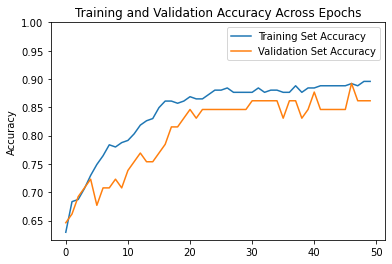

In [18]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

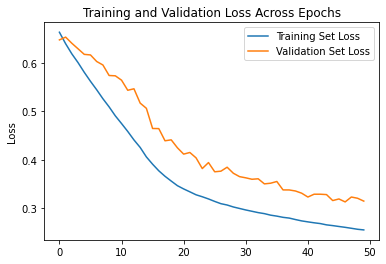

In [19]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Across Epochs')
plt.legend()

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
y_pred = model.predict(X_test)>0.4

2/2 [==============================] - 0s 2ms/step


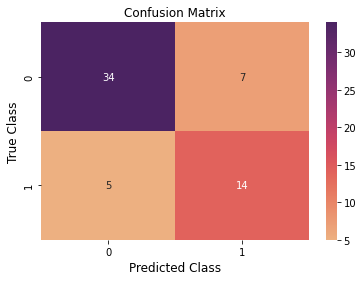

In [22]:
confusion_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        41
           1       0.67      0.74      0.70        19

    accuracy                           0.80        60
   macro avg       0.77      0.78      0.78        60
weighted avg       0.81      0.80      0.80        60

